# Empirical analysis of asset returns

The most obvious measure for analyzing the value of an asset is its price which tells us how much money we need to invest to purchase a unit of the asset. However, prices are hard to compare and come along with undesirable statistical properties. The plot below illustrates the price development for a few stocks. 

```{note}
During this course you are often going to see tickers or symbols instead of company names, respectively. Usually, these are abbreviations of the company name which are used on exchanges. 
```

We observe that these prices are on different levels, some of them seem to remain within a certain numerical range while others steadily increase over time. Furthermore, even though the graphic provides some intuition about the price development of an asset, it is rather meaningless if we want to compare the profitability as well as the risk of investments. 

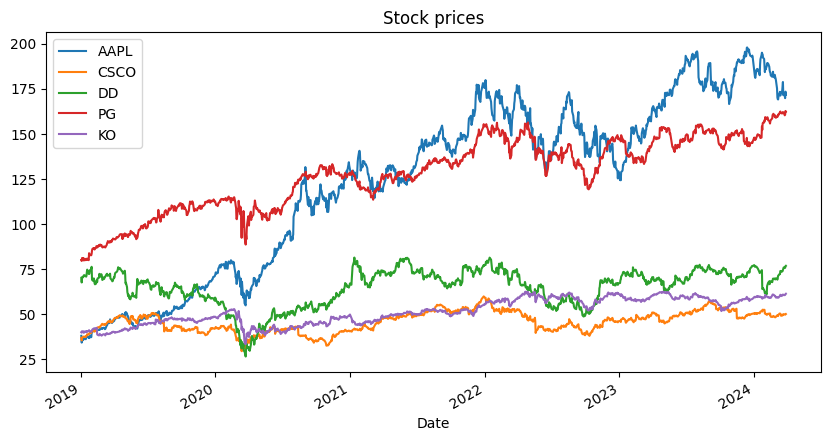

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

df_close = pd.read_csv("../data/dow_close.csv")
df_close.Date = pd.to_datetime(df_close.Date)
df_close.set_index("Date", inplace = True)

df_volume = pd.read_csv("../data/dow_volume.csv")
df_volume.Date = pd.to_datetime(df_volume.Date)
df_volume.set_index("Date", inplace = True)

df_returns = pd.read_csv("../data/dow_returns.csv")
df_returns.Date = pd.to_datetime(df_returns.Date)
df_returns.set_index("Date", inplace = True)

fig, ax = plt.subplots(figsize = (10, 5))
df_close.loc[:, ["AAPL", "CSCO", "DD", "PG", "KO"]].plot(ax = ax, title = "Stock prices")
#df_returns.loc[:, ["AAPL", "CSCO", "DD", "PG", "KO"]].plot(ax = axs[1])
plt.show()

Thus, instead of prices themselves, one usually converts them into discrete returns which are the percentage change over a fixed time period. Given $s_t$ as the price of an asset at time $t$, we calculate the discrete return $r_t$ by:

$$
r_t = \frac{s_t - s_{t-1}}{s_{t-1}} = \frac{s_t}{s_{t-1}} - 1
$$

```{note}
Usually one distinguishes between a random variable $S_t$ and a realization $s_t$ by using large or small letters. However, to keep the notation simple, we always use small letters and assume the reader is able to distinguish between the concept of random variables and its realizations.  
```

Below, we observe the discrete returns which correspond to the prices above. They seem to wander around zero over time and remain withing a numerical range. These are better properties when comparing them and are going to be formalized later in the course by the concept of stationarity. They are called discrete because the way how they are calculated assumes that prices are tracked at discrete points in time. If one assumes continuous trading over time, the value change is quantified by log-returns $z_t$ which are determined by:

$$
z_t = \ln \left( \frac{s_t}{s_{t-1}} \right) = \ln \left(s_t\right) - \ln \left(s_{t-1}\right)
$$

For the moment, just keep in mind that discrete and log-returns are very similar if the value change of the corresponding price is not too large and the both have different mathematical properties which can be of advantage for different applications. The mathematical relationship between both return definitions is given by:

$$
z_t = \ln \left(1 + r_t\right) \\
r_t = e^{z_t} - 1
$$

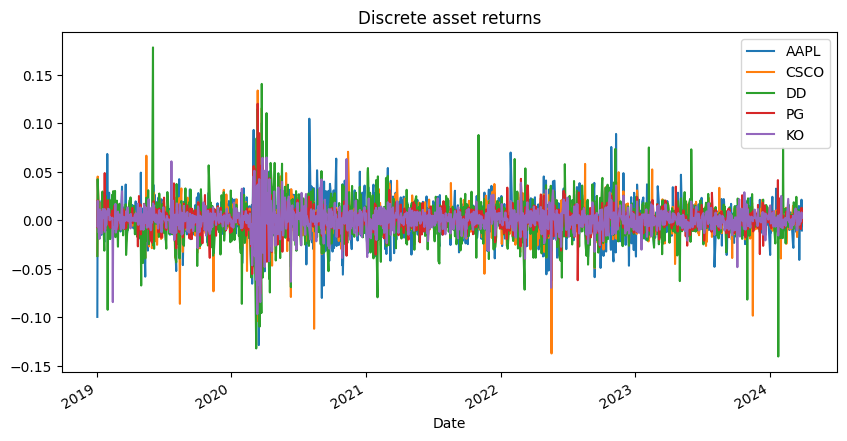

In [2]:
fig, ax = plt.subplots(figsize = (10, 5))
df_returns.loc[:, ["AAPL", "CSCO", "DD", "PG", "KO"]].plot(ax = ax, title = "Discrete asset returns")
plt.show()

## Random variables

Asset returns are random variables so let us quickly review the concept of a random variable. If an outcome of an event is uncertain, we try to quantify this uncertainty via probabilities for all possible outcomes. Formally, a probability distribution and the concept of a random variable is based upon:

1. A set of all possible outcomes $\Omega = \{ \omega_1, ..., \omega_n  \}$
2. **Events** which are subsets $A \subseteq \Omega$ and a set of events $\mathcal{F}$ called $\sigma$-algebra, which fulfills three requirements:
    1. $\Omega \in \mathcal{F}$
    2. $A \in \mathcal{F} \Rightarrow \bar{A} \in \mathcal{F}$
    3. $A_1, A_2, ... \in \mathcal{F} \Rightarrow \bigcup\limits_{i \in \mathbb{N}} A_i \in \mathcal{F}$
3. A mapping called **probability** $P: \mathcal{F} \rightarrow [0,1]$  which assigns numbers $[0,1]$ to every event $A$. The probability mapping must fulfill the axioms of probability:
    1. $P(A \geq 0)~ \forall A_i~ \in \mathcal{F}$
    2. $P(\Omega) = 1$
    3. $P\left(\bigcup\limits_{i = 1}^{\infty} A_i \right) = \sum_{i = 1}^{\infty} P(A_i) \forall A_i \in \mathcal{F}$ with $A_j \cap A_k = \emptyset$, $j \neq k$
    
Usually, we are not interested in the event itself but in a number associated with the event, e.g., units sold, revenue, price, ... We call these numbers **random numbers** which are realizations of **random variables**. A one-dimensional random variable $x$ maps the set of outcomes $\Omega$ to real numbers:

$$x: \Omega \to \mathbb{R}$$
$$\omega \to x(\omega)$$

For instance a coin tossing game with outcomes $\omega_1$: *head* and $\omega_2$: *tail*. If *head* is the outcome, we win 5 bucks and if *tail* is the outcome we loose 5 bucks. The random number $x$ describing our profit for a coin toss is defined by:

$x(\omega_1) = 5$ and $x(\omega_2) = -5$. More technically speaking $x$ must be **measurable**. Given a subset of $B \in \mathbb{R}$, the inverse image of $B$ with respect to $X$ is:

$$x^{-1}(B) = \lbrace \omega \in \Omega | x(\omega) \in B \rbrace $$

Let $\mathcal{B}$ be a set of subsets from $\mathbb{R}$, $x$ is measurable if $x^{-1}(B) \in \mathcal{F}$ for all $B \in \mathcal{B}$. For the probability measure of $x$, it holds that:

$$P_x(x \in B) = P(x^{-1}(B)), B \in \mathcal{B}$$

Thus, $x$ is not just a measure mapping outcomes to numbers, but rather maps from one probability space $(\Omega, \mathcal{F}, P)$ to probability space $(\mathbb{R}, \mathcal{B}, P_x)$.

### Univariate Random Variables

Random variables can be **discrete** or **continuous**. The former has only a finite amount of realizations (or infinite countable realizations), while the latter can exhibit an infinite amount of different realizations. 

For a discrete random variable, the function assigning probabilities to its realizations is called **probability mass function** and is given by a list-alike definition:

$$
f(x) = \begin{cases}
			P_x(\{ x \}) & \text{for } x  \\
			0 & \, \text{else}
         \end{cases}
$$


The function 

$$
F(x)  = P_x\left( (-\infty, x] \right) = \sum_{x_i \leq x} f(x_i)
$$

is called **cumulative distribution function**.

For a continuous random variable, the probability of a concrete realization is equal to 0, $P(x = 0) = 0$. Instead of directly defining a function mapping probabilities to subsets of $\mathbb{R}$, we define a **probability density function** $f(x)$ which enables us to determine probabilities by integration. The domain of this function must be the set of all possibles states of $x$. Furthermore, it must hold the $f(x) \geq 0$ for all $x$ and that $\int_{-\infty}^{\infty} f(x)dx = 1$. With this definition the corresponding cumulative distribution function is given by:

$$
F(x) = \int_{-\infty}^{x} f(t)dt
$$

Probability distributions can be compared by numbers which summarize their characteristics such as location, variation, shape and so on. For this purpose, ordinary and central moments of the distributions are used. 

The **expectation** or **expected value** of a random variable if defined as:

$$
E(x) = \begin{cases}
			\sum_i x_i \cdot f(x_i) &  x   \text{ discrete} \\
			\int_{-\infty}^{\infty} x \cdot f(x) dx & x \text{ continuous}
       \end{cases}
$$

The expectation is linear which means: $E(x + y) = E(x) + E(y)$ and $E(ax) = a E(x)$ holds. In addition the relation $E(a + bx) = a + b E(x)$ can be useful in some cases.

The **variance** measures how much realizations of a random variable vary and is defined by:

$$
Var(x) = E(x-E(x))^2 =
			\begin{cases}
			\sum_i (x_i - E(x))^2 \cdot f(x_i)   & x \text{ discrete} \\
			\int_{-\infty}^{\infty} (x - E(x))^2 \cdot f(x) dx  & x \text{ continuous}
			\end{cases}
$$

For the variance, it holds that $Var(a + bx) = b^2 Var(x)$. The square root of the variance defines the **standard deviation** which is often denoted by the symbol $\sigma_x$.

If a probability distribution is not symmetric it is skewed. To quantify **skewness**, we use:

$$
\frac{E \left[\left(x - E(x)\right)^3 \right]}{\sigma_x^3}  
$$

For negative values, the distribution is left skewed and for positive values, the distribution is right skewed. In addition of skewness, **kurtosis** is also often used for the characterization of probability distributions. 

$$
\frac{E \left[\left(x - E(x)\right)^4 \right]}{\sigma_x^4}  
$$

To characterize the level of kurtosis, the normal distribution is usually taken as a reference. It exhibits a kurtosis of $3$. If distributions exhibit higher kurtosis than $3$, we speak of excess kurtosis and leptokurtic distributions. These distributions are characterized by higher probability mass in the tails of the distribution. This means, extreme outcomes of the random variable are more likely. If a distribution exhibits a kurtosis lower then $3$, we say it is platokurtic. 

Besides those four characteristic measures, quantiles of probability distributions can be used for informational purposes. Let us denote $F^{-1}: [0, 1] \to \mathbb{R}$ as the inverse of the cumulative distribution function. Given some probability $\alpha$, we say $x_{\alpha} = F^{-1}(\alpha)$ is the $\alpha$ **quantile** of $x$, if:

$$
1 - F(x_{\alpha}) \geq 1 - \alpha ~~\text{and } F(x_{\alpha}) \geq \alpha
$$

For instance assume you own an insurance company and $x$ represents losses in million due to damages of houses for a year. A value of $x_{0.95} = 1000$ tells us that losses higher than 1000 will only be exceeded with a probability of 95%. If another company has a value which is higher, e.g., 1100, we immediately know that the latter company faces a greater probability of high losses. At the same time it is possible that both companies have the same expectation for such losses. 

## Descriptive statistics

If asset returns are understood as a random variable, we can analyze return distributions to understand common characteristics of them. The question arises  which distributions are suitable for modeling asset returns. In order to investigate this question, we first look at the empirical distribution of daily returns of Apple shares as an example. We observe a distribution which seems to be centered around zero and is rather symmetric. However, negative returns seem to be a little bit more extreme than their positive counterparts. Comparing the empirical densities with the one of a normal distribution also reveals excess kurtosis indicating a leptokurtic distribution. While the visualization is quite informative, we run into problems if we want to compare a larger number of asset return distributions. To summarize key characteristics of the return distribution, descriptive metrics can be used with this respect. Popular examples are the arithmetic mean, empirical standard deviation, skewness and excess kurtosis. These metrics are estimates for the mean, the variation, skewness and excess kurtosis. 

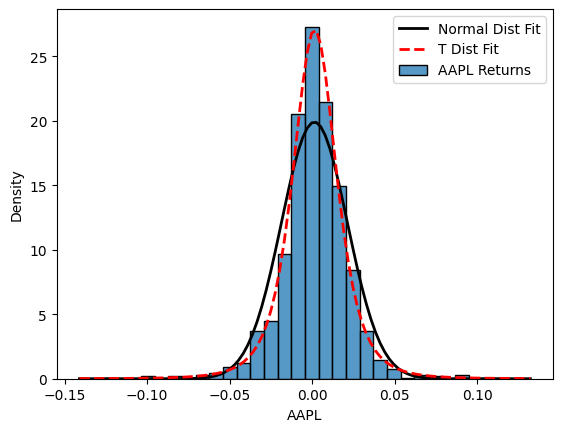

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, norm

# Selecting Apple
aapl_returns = df_returns['AAPL']

# Plot the histogram for AAPL returns
sns.histplot(aapl_returns, kde=False, bins=30, stat='density', label='AAPL Returns')

# Normal Distribution Fit
mean, std = norm.fit(aapl_returns)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Dist Fit')

# t distribution fit
df, loc, scale = t.fit(aapl_returns)
p_t = t.pdf(x, df, loc, scale)
plt.plot(x, p_t, 'r--', linewidth=2, label='T Dist Fit')

plt.legend()
plt.show()

The sample mean ($\bar{x}$) is calculated as the sum of all observed values $\lbrace x_1, ..., x_n \rbrace$ divided by the number of observations $n$:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

The sample standard deviation (s) is calculated as the square root of the sample variance, which in turn is the sum of squared deviations from the mean, divided by the number of observations (minus one):

$$
s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

The skewness is the average of standardized observations to the power of three. To avoid bias, the definition for the skewness (g1​) below is calculated using the adjusted Fisher-Pearson standardized moment coefficient:

$$
g_1 = \frac{n}{(n-1)(n-2)} \sum \left( \frac{x_i - \bar{x}}{s} \right)^3
$$

Kurtosis is the average of standardized observations to the power of four. Again, controlling for bias, the empirical estimator is given by:

$$
g_2 = \left( \frac{n(n+1)}{(n-1)(n-2)(n-3)} \sum \left( \frac{x_i - \bar{x}}{s} \right)^4 \right) - \frac{3(n-1)^2}{(n-2)(n-3)}
$$

In short, the sample mean provides information regarding the center of the distribution, the standard deviation quantifies the average level of deviations from the mean, negative (positive) values for $g_1$ indicate a left-skewed (right-skewed) distribution, a value higher than $3$ for $g_2$ indicates excess kurtosis and a leptokurtic distribution. Leptokurtic distributions have more probability mass in the tails of the distribution. This means that extreme negative or positive realizations tend to occur more often. Especially the combination of a heavy tailed left-skewed distribution implies more risk for investors as negative values tend to be higher in absolute terms than positive values. To examine extreme values in more detail, one can take a look at empirical quantiles at levels such as $1\%, 5\%, 95\%, 99\%$. To define the quantile, we first define the empirical cumulative distribution function $\hat{F}$ as:

$$
\hat{F}_n(x) = \frac{1}{n} \sum_{i=1}^n \mathbf{1}(x_i \leq x)
$$

where $\mathbf{1}$ is an indicator function which is $1$ if $x_i \leq x$ and $0$ otherwise. The empirical $\alpha \in [0, 1]$ quantile $x_{\alpha}$ is technically defined by:

$$
x_{\alpha} = \inf \{x \in \mathbb{R} : \hat{F}_n(x) \geq p\}
$$

where the $\inf$ returns the highest lower bound of a subset such that $\hat{F}_n(x) \geq p$. Besides the technical definition, it is maybe better to picture an empirical quantile in the following way. Given the ranked order of $n$ data points $x_{(1)}, x_{(2)}, ..., x_{(n)}$, where $x_{(1)}$ is the smallest and $x_{(n)}$ is the highest realization of $x$. To find the $\alpha$-th quantile, we look for a value $x_{\alpha}$ such that $\frac{1}{n} \sum_{i=1}^n \mathbf{1}(x_i \leq x_{\alpha}) \geq \alpha$ and $\frac{1}{n} \sum_{i=1}^n \mathbf{1}(x_i \geq x_{\alpha}) \geq 1-\alpha$. If $n \alpha$ is an integer number, the value can be any value in the interval $[x_{(n \alpha)}, x_{(n \alpha+1)}]$ (often one averages both values). If $n\alpha$ is not an integer, the empircal quantile is $x_{(\lfloor n\alpha \rfloor +1)}$. Even though, this still may look quite technical, what you basically do is to order the values, and, loosely speaking,  use the $n \alpha$-th value of the orderer values. In terms of a frequentistic interpretation, we only expect a frequency of $n \alpha$ to be lower or equal to $x_{\alpha}$. For instance, the $5$\% quantile of the returns distribution is a rather extreme observation for which we only observe $np$ observations to be even smaller. 

The table below shows the sample mean, standard deviation, skewness, kurtosis, the $5\%$ and $95\%$ quantile for the discrete daily returns of companies which have been in the Dow Jones since 2019 (and which exited since then). We observe that the mean is close to zero for all companies, approximately the half of all companies have left skewed distributions while all distributions are leptokurtic. Extreme values seem to start around $0.02$ in absolute size.

In [4]:
mssk_daily = pd.concat((df_returns.mean(), df_returns.std(ddof = 1), df_returns.skew(), df_returns.kurtosis(), df_returns.quantile([0.05, 0.95]).transpose()), axis = 1).round(4)
mssk_daily.columns = ["mean", "std", "skewness", "kurtosis", "q05", "q95"]
mssk_daily

,mean,std,skewness,kurtosis,q05,q95
AAPL,0.0013,0.0200,-0.0362,5.3284,-0.0305,0.0308
AMGN,0.0005,0.0159,0.5581,6.7786,-0.0223,0.0236
AXP,0.0010,0.0234,1.2444,18.3518,-0.0307,0.0326
BA,0.0001,0.0314,0.2573,12.3020,-0.0430,0.0427
CAT,0.0011,0.0203,-0.2173,4.4383,-0.0307,0.0323
CRM,0.0009,0.0239,0.7651,13.8813,-0.0350,0.0346
CSCO,0.0004,0.0175,-0.5776,12.0480,-0.0243,0.0240
CVX,0.0007,0.0220,-0.2623,22.4888,-0.0279,0.0306
DD,0.0003,0.0224,0.1582,8.6776,-0.0326,0.0316
DIS,0.0003,0.0210,0.4819,8.8903,-0.0299,0.0323


## Time series perspective

The histogram and descriptive statistics provide an unconditional perspective. In this context, unconditional means we examine certain characteristics over time without taking into account the current situation at time $t$. However, financial markets tend to move through varying market conditions such as booming periods as well as times of financial turmoil and crisis. Given, we are currently in a tensed economic situation, our expectation regarding profits and risk may be different in comparison to a booming period with promising economic conditions. This is a conditional perspective. *Conditional* we are in a good (adverse) state, we expect different things. This is what can be better examined when we illustrate the time-series of asset returns. A time series is sequence of observations in chronological order. 

### Auto-correlation and volatility clustering
In the figure below, we observe the time series of daily returns and absolute daily returns for Dow Jones constituents over the past years. While the illustration does not allow to precisely follow individual developments, it reveals an important pattern. It appears that absolute return levels vary over time and occur in clusters. As the mean of daily returns is close to zero, this means that deviations from the mean vary over time and exhibit some form of time-specific dependence. This phenomenon is known as *volatility clustering*. Conditional, we currently observe a large deviation form the mean, tomorrow's deviation from the mean may also be large.

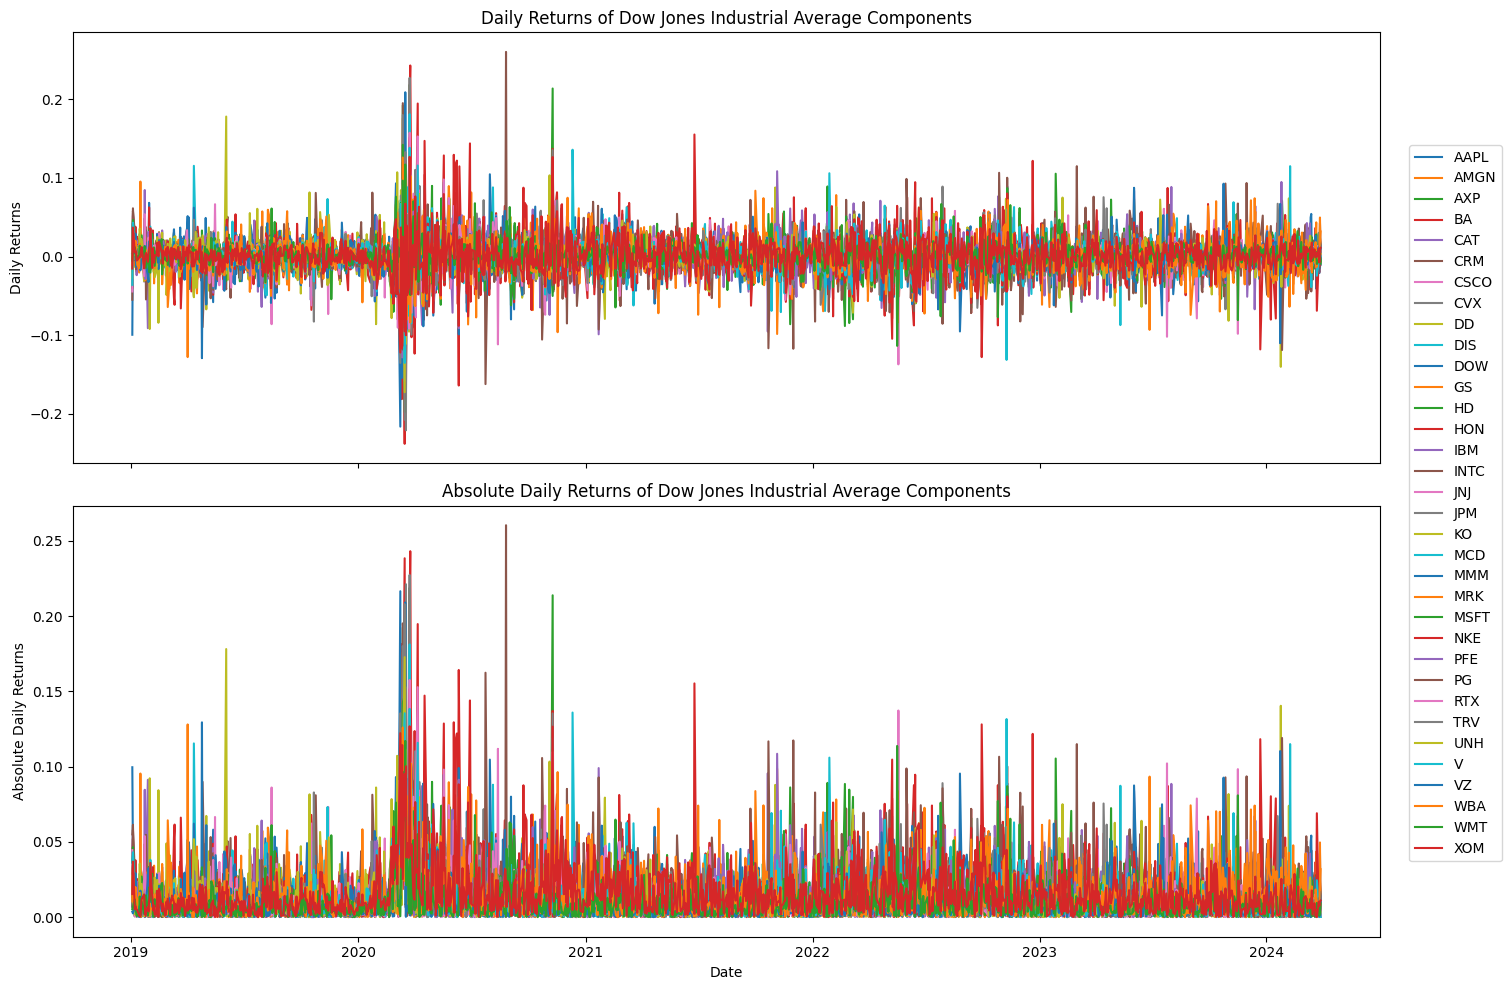

In [5]:
import matplotlib.pylab as plt

fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# First plot for daily returns
for column in df_returns.columns:
    axs[0].plot(df_returns.index, df_returns[column], label=column)
axs[0].set_title('Daily Returns of Dow Jones Industrial Average Components')
axs[0].set_ylabel('Daily Returns')

# Second plot for absolute values over time
for column in df_returns.columns:
    axs[1].plot(df_returns.index, df_returns[column].abs(), label=column)  # Use .abs() for absolute values
axs[1].set_title('Absolute Daily Returns of Dow Jones Industrial Average Components')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Absolute Daily Returns')

# Place a legend outside of the figure
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.01, 0.85), borderaxespad=0)

plt.tight_layout()
plt.show()

To quantify and examine the extent of dependence between observations, we can use the auto-covariance or auto-correlation, respectively. Remember, that the covariance between two random numbers $x$ and $y$. 

$$
\text{Cov}(x, y) = E\left[ (x - \mu_x)(y - \mu_y) \right]
$$

where $\mu_x, \mu_y$ are the mean of $x, y$, respectively. The Bravais-Pearson correlation is defined by: 

$$
\rho_{x,y} = \frac{\text{Cov}(x, y)}{\sigma_x \sigma_y}
$$

where $\sigma_x, \sigma_y$ are the standard deviation of $x, y$, respectively. The correlation is the standardized version of covariance and is bounded in the range $[-1, 1]$. Covariance and correlation quantify the level of linear dependence between two random variables. 

For a time-series, we can adapt this concept and quantify the auto-covariance. The auto-covariance function measures the covariance of a process with itself at different times. For a time series $x_t$​, the auto-covariance for lags $k$ is defined as:

$$
\gamma(k) = E\left[ (x_{t+k} - \mu)(x_t - \mu) \right]
$$

This gives us the formula for auto-correlation:

$$
\rho(k) = \frac{\gamma(k)}{\gamma(0)}
$$

The auto-covariance and auto-correlation can be estimated by:

$$
\hat{\gamma}(k) = \frac{1}{n} \sum_{t=1}^{n-k} \left( x_{t+k} - \bar{x} \right) \left( x_{t} - \bar{x} \right) \\
\hat{\rho(k)} = \frac{\hat{\gamma}(k)}{\hat{\gamma}(0)}
$$

The plot below exhibits the auto-correlation for daily discrete returns and absolute daily discrete returns of the Apple stock. We observe low auto-correlation for the returns, however, higher correlation for absolute values. This pattern is true for many different assets. Its implication is that we usually have a hard time to estimate the future direction of returns based upon their history, however, we may be able to predict the absolute level of returns in better ways. This implies that volatility can be predicted to a certain level based upon historical data.

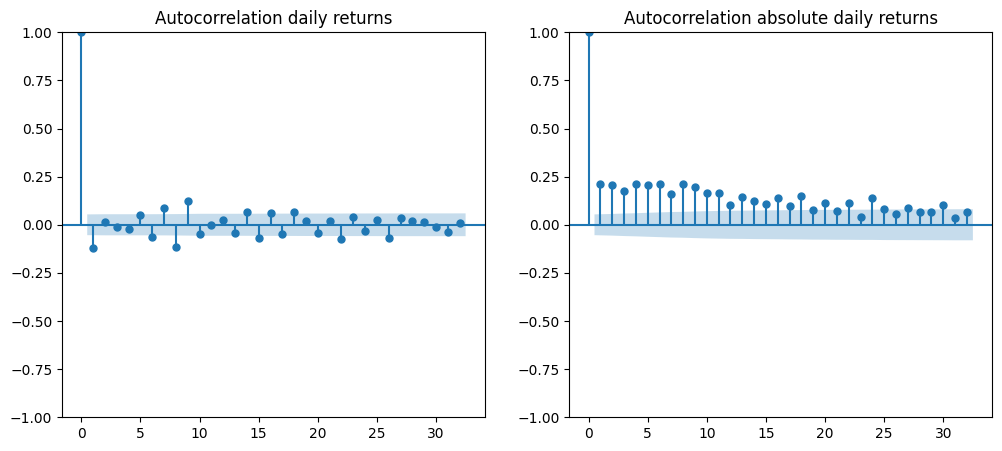

In [6]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
plot_acf(df_returns.AAPL, ax = axs[0], title = "Autocorrelation daily returns")
plot_acf(df_returns.AAPL.abs(), ax = axs[1], title = "Autocorrelation absolute daily returns")
plt.show()

To test if auto-correlation is statistically significant different from zero (up to certain lags), we can use the Ljung-Box test. Its null hypothesis is:

$$
\begin{align*}
H_0:& \quad \rho{1} = \rho(2) = ... = \rho(k) = 0 \\
H_a:& \quad \text{Any } \rho(j) \neq 0
\end{align*}
$$

If the Ljung-Box test rejects the null hypothesis, we conclude that at least the auto-correlation for one lage between $1$ and $k$ is different from zero. The table below exhibits autocorrelation and p-values for the Ljung-Box test using a lag $k=1$ of daily returns and daily absolute returns. For instance, conducting each test at a significance level of $0.05$, we observe that some tests for returns would not reject the null hypothesis while the null hypothesis would be rejected for all companies when analyzing the auto-correlation of absolute returns. This underlines the common empirical finding of lower auto-correlation for returns and higher auto-correlation of absolute returns.

In [7]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import acf

ac_lag_one = df_returns.apply(lambda x: acf(x.dropna())[1], axis = 0)
abs_ac_lag_one = df_returns.abs().apply(lambda x: acf(x.dropna())[1], axis = 0)

lb_returns = df_returns.apply(lambda x: acorr_ljungbox(x.dropna(), lags = 1).lb_pvalue.values[0].round(4), axis = 0)
lb_abs_returns = df_returns.abs().apply(lambda x: acorr_ljungbox(x.dropna(), lags = 1).lb_pvalue.values[0].round(4), axis = 0)
lb_test = pd.concat((ac_lag_one, lb_returns, abs_ac_lag_one, lb_abs_returns), axis = 1)
lb_test.columns = ["ac returns lag=1", "p_value", "ac absolute returns lag=1", "p_value"]
lb_test

,ac returns lag=1,p_value,ac absolute returns lag=1,p_value
AAPL,-0.120865,0.0000,0.210125,0.0
AMGN,-0.096045,0.0005,0.238588,0.0
AXP,-0.073092,0.0079,0.341812,0.0
BA,0.070304,0.0106,0.378597,0.0
CAT,-0.022380,0.4160,0.165356,0.0
CRM,-0.026554,0.3345,0.209375,0.0
CSCO,-0.139037,0.0000,0.309159,0.0
CVX,-0.123477,0.0000,0.256751,0.0
DD,-0.049286,0.0732,0.233687,0.0
DIS,-0.074999,0.0064,0.206865,0.0


### Aggregation over time

So far, we examined daily returns which are usually relatively small due to the short time interval. To determine the return over a longer time period, one needs to distinguish between discrete and log-returns. Let us define the discrete gross return by $\left(1 + r_t\right)$. The discrete gross return over the last $h$ periods is the product of the last $h$ gross returns:

$$
1 + r_t(h) = \left(1 + r_{t-h+1}\right) \cdot ... \cdot \left(1 + r_{t}\right) = \prod_{i = t-h+1}^t \left(1 + r_i\right)
$$

This means the discrete return for $h$ periods is: $r_t(h) = \prod_{i = t-h+1}^t \left(1 + r_i\right) - 1$. To determine the log-return for $h$ periods, we can use previous definitions:

$$
\begin{split}
z_t(h) & = \ln \left(1+ r_t(h)\right) = \\
& =  \ln \left(\left(1 + r_{t-h+1}\right) \cdot ... \cdot \left(1 + r_{t}\right) \right) = \\
& = \ln \left(1 + r_{t-h+1}\right) + ... +\ln \left(1 + r_{t}\right) = \\
& = z_{t-h+1} + ... + z_t = \\
& = \sum_{i = t-h+1}^t z_i
\end{split}
$$

The log-return is additive over time which means we simply can sum over the single period's log-returns to determine the log-return for the full period. This simplifies the calculation for common time periods such as weekly, monthly or annual returns. The simpler calculation is the reason why we often observe the usage of log-returns if value development is quantified over time. Morever, aggregated log-returns can be converted back to discrete returns.

The tables and figures below exhibit all quantities from the analysis of daily returns before. Most notably, is the less extreme behavior, the decrease of excess kurtosis as well as the vanishing auto-correlation of returns and absolute returns. Overall, returns tend to behave more *normal* over longer time periods. 

In [8]:
df_returns_log = df_returns.apply(lambda x: np.log(1 + x))
df_monthly_returns_log = df_returns_log.reset_index().groupby(pd.Grouper(key = 'Date', freq = "ME")).sum()
df_monthly_returns  = df_monthly_returns_log.apply(lambda x: np.exp(x) - 1)

mssk_monthly = pd.concat((df_monthly_returns.mean(), df_monthly_returns.std(ddof = 1), df_monthly_returns.skew(), df_monthly_returns.kurtosis(), df_monthly_returns.quantile([0.05, 0.95]).transpose()), axis = 1).round(4)
mssk_monthly.columns = ["mean", "std", "skewness", "kurtosis", "q05", "q95"]
mssk_monthly

,mean,std,skewness,kurtosis,q05,q95
AAPL,0.0278,0.0854,-0.0615,-0.8711,-0.1135,0.1546
AMGN,0.0113,0.0718,0.3171,-0.0735,-0.0821,0.1244
AXP,0.0187,0.0864,0.0745,1.6617,-0.1225,0.1582
BA,0.0021,0.1388,0.1598,2.3979,-0.1858,0.2360
CAT,0.0232,0.0932,0.3709,0.8844,-0.1110,0.1806
CRM,0.0180,0.1060,0.9020,1.9906,-0.1473,0.2120
CSCO,0.0078,0.0764,0.1422,-0.2592,-0.1146,0.1445
CVX,0.0135,0.0941,0.5570,1.5576,-0.1340,0.1844
DD,0.0069,0.1062,0.3781,1.6764,-0.1951,0.1340
DIS,0.0071,0.1022,0.4167,-0.0587,-0.1490,0.2153


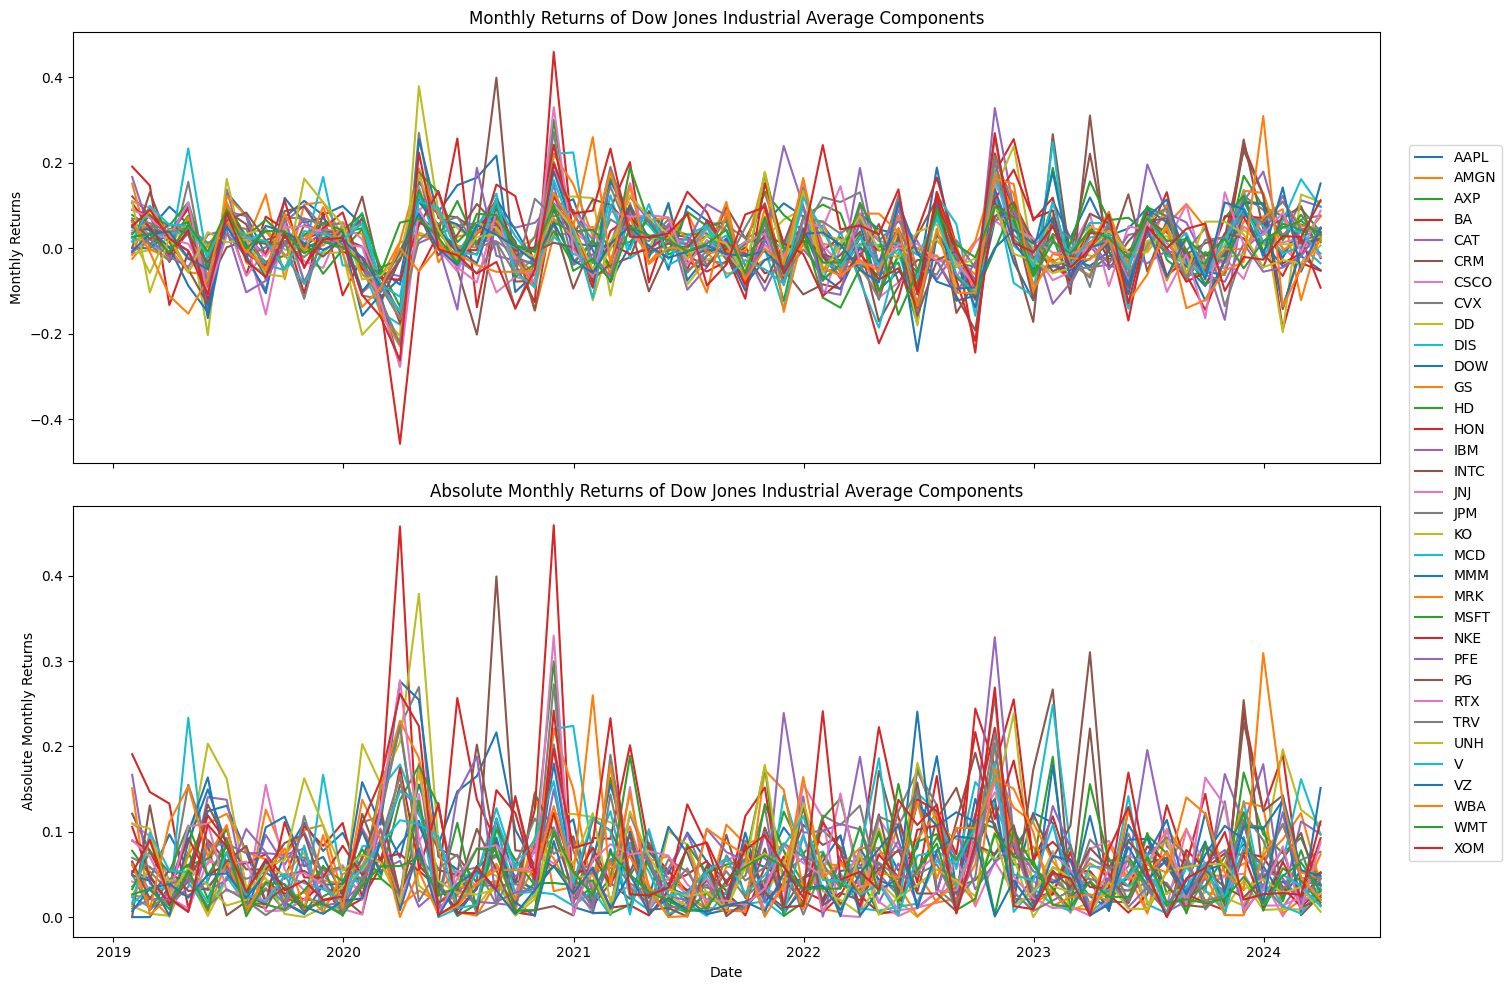

In [9]:
import matplotlib.pylab as plt

fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# First plot for daily returns
for column in df_monthly_returns.columns:
    axs[0].plot(df_monthly_returns.index, df_monthly_returns[column], label=column)
axs[0].set_title('Monthly Returns of Dow Jones Industrial Average Components')
axs[0].set_ylabel('Monthly Returns')

# Second plot for absolute values over time
for column in df_monthly_returns.columns:
    axs[1].plot(df_monthly_returns.index, df_monthly_returns[column].abs(), label=column)  # Use .abs() for absolute values
axs[1].set_title('Absolute Monthly Returns of Dow Jones Industrial Average Components')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Absolute Monthly Returns')

# Place a legend outside of the figure
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.01, 0.85), borderaxespad=0)

plt.tight_layout()
plt.show()

In [10]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import acf

ac_lag_one = df_monthly_returns.apply(lambda x: acf(x.dropna())[1], axis = 0)
abs_ac_lag_one = df_monthly_returns.abs().apply(lambda x: acf(x.dropna())[1], axis = 0)

lb_returns = df_monthly_returns.apply(lambda x: acorr_ljungbox(x.dropna(), lags = 1).lb_pvalue.values[0].round(4), axis = 0)
lb_abs_returns = df_monthly_returns.abs().apply(lambda x: acorr_ljungbox(x.dropna(), lags = 1).lb_pvalue.values[0].round(4), axis = 0)
lb_test = pd.concat((ac_lag_one, lb_returns, abs_ac_lag_one, lb_abs_returns), axis = 1)
lb_test.columns = ["ac returns lag=1", "p_value", "ac absolute returns lag=1", "p_value"]
lb_test

,ac returns lag=1,p_value,ac absolute returns lag=1,p_value
AAPL,0.062922,0.6091,0.064471,0.6003
AMGN,-0.109709,0.3726,-0.091491,0.4571
AXP,-0.017553,0.8866,0.046763,0.7039
BA,0.034107,0.7816,0.020750,0.8661
CAT,-0.069894,0.5700,0.047846,0.6974
CRM,-0.100502,0.4141,-0.134187,0.2755
CSCO,-0.089900,0.4650,-0.041053,0.7386
CVX,-0.152101,0.2164,0.122996,0.3175
DD,-0.097434,0.4284,0.371302,0.0025
DIS,-0.099154,0.4203,0.075390,0.5401


The implications of these observations are that predictions for the volatility are far more promising for a shorter time horizon. Furthermore, for a longer investment perspective less extreme statistical distributions are needed for an adequate model. However, given the existence of volatility clustering and partly extreme behavior of daily returns, one may need to pay attention to these characteristics for considerations which are in need of quick reactions and actions such as risk management strategies. 

In the next chapter, we are going to look at reasonable statistical models for asset returns. More concrete, which distributions seem to be suited for modeling asset returns and how can we include characteristics such as auto-correlation into the model. 

### Stylized facts about asset returns

Stylized facts are empirical results which tend to repeat for the majority of asset returns. In this chapter, we already examined the following which are often found for daily returns:

* Non-normality: asset return distributions tend to exhibit heavy tails which makes extreme movements more likely
* Skewness: many empirical analyses observe that the majority of asset return distributions are left-skewed
* Auto-correlation and volatility clustering: asset returns seem not to be independent over time, this is more pronounced regarding absolute returns which explains observed clusters of more volatile periods 
* Normality for longer periods: effects of non-normality, skewness, auto-correlation and volatility clustering are less pronounced for asset returns of longer periods such as monthly returns

Further examples which are often detected are weekday or seasonality effects. For instance, previous analyses detected that stocks performed significantly better at the beginning of a years, i.e., the January effect. Another example is positive correlation between trading volume and absolute returns which implies larger price changes on days with more trading. 

For our example with Dow Jones companies, let us quickly examine these aspects, at least descriptively or visually.

Positive correlation between trading volume and absolute daily returns seems to exist.

In [11]:
corrs = []
for col in df_returns.columns:
    corr = df_returns.abs().loc[:, [col]].merge(df_volume.loc[:, [col]], left_index = True, right_index = True).corr().iloc[0, 1]
    corrs.append(corr)

pd.DataFrame(corrs, index = df_returns.columns, columns = ["vol_abs_return_corr"])

,vol_abs_return_corr
AAPL,0.546848
AMGN,0.466502
AXP,0.650066
BA,0.575894
CAT,0.577648
CRM,0.585797
CSCO,0.554440
CVX,0.485310
DD,0.384137
DIS,0.633372


A January effect seems not to be present for these companies, either a November effect.

In [12]:
returns_by_month = df_monthly_returns.groupby(df_monthly_returns.index.month).mean().transpose()
returns_by_month.columns = [
    "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"
]
returns_by_month.describe()

,January,February,March,April,May,June,July,August,September,October,November,December
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,0.009170,-0.009084,0.006756,0.027405,-0.006120,0.010640,0.023566,0.001102,-0.035383,0.029053,0.059411,0.028017
std,0.030528,0.025391,0.032055,0.035424,0.016968,0.024486,0.028470,0.023398,0.018834,0.026614,0.035191,0.024664
min,-0.056711,-0.059689,-0.075931,-0.078743,-0.041405,-0.027631,-0.033479,-0.053045,-0.076003,-0.027991,0.002328,-0.066476
25%,-0.002290,-0.025924,-0.009913,0.012070,-0.018822,-0.001636,0.009072,-0.015809,-0.050899,0.011140,0.030917,0.022283
50%,0.005062,-0.014239,0.006764,0.039632,-0.005240,0.007401,0.030306,0.000039,-0.030037,0.025574,0.060378,0.029948
75%,0.026391,0.012078,0.033672,0.049321,0.006502,0.023129,0.038531,0.013960,-0.022688,0.046463,0.078390,0.038837
max,0.084357,0.038084,0.069536,0.073403,0.025368,0.077983,0.101586,0.067705,-0.006916,0.096286,0.198722,0.082483


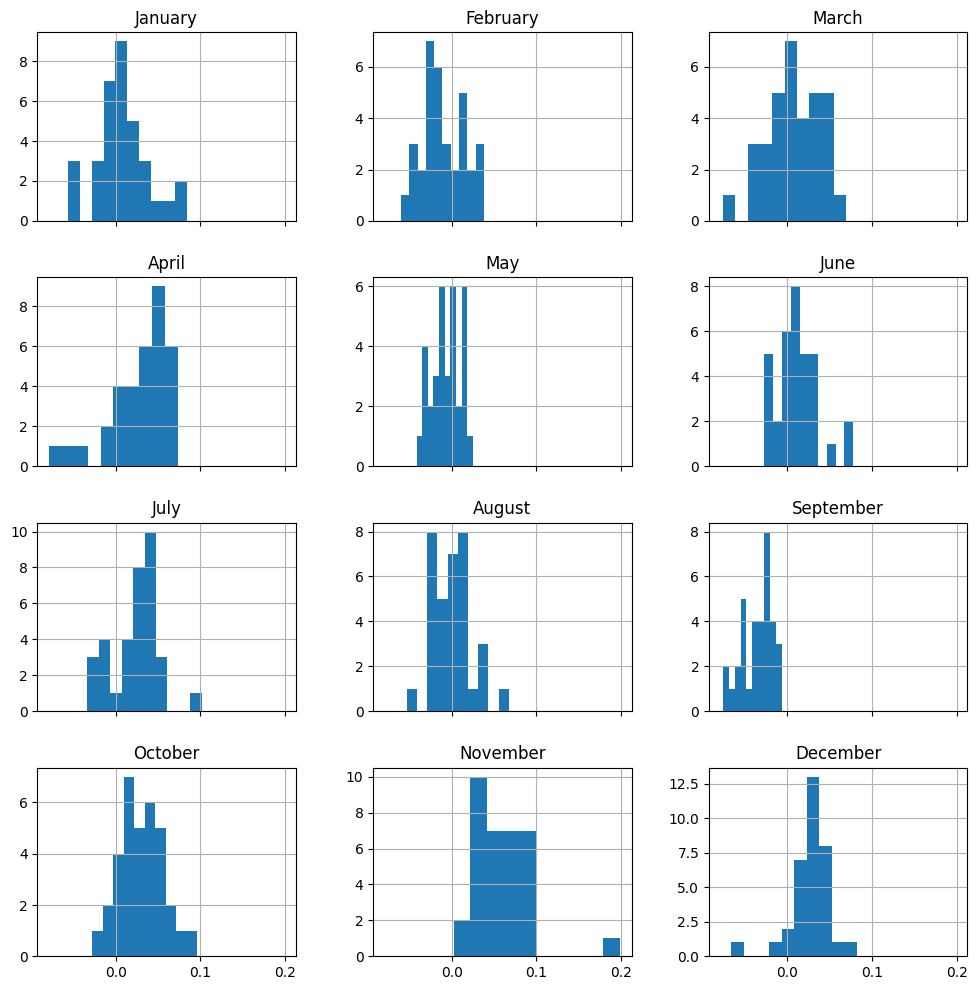

In [13]:
returns_by_month.hist(figsize = (12, 12), sharex = True)
plt.show()

Regarding weekdays, it rather looks like Mondays and Fridays exhibit higher returns for these companies.

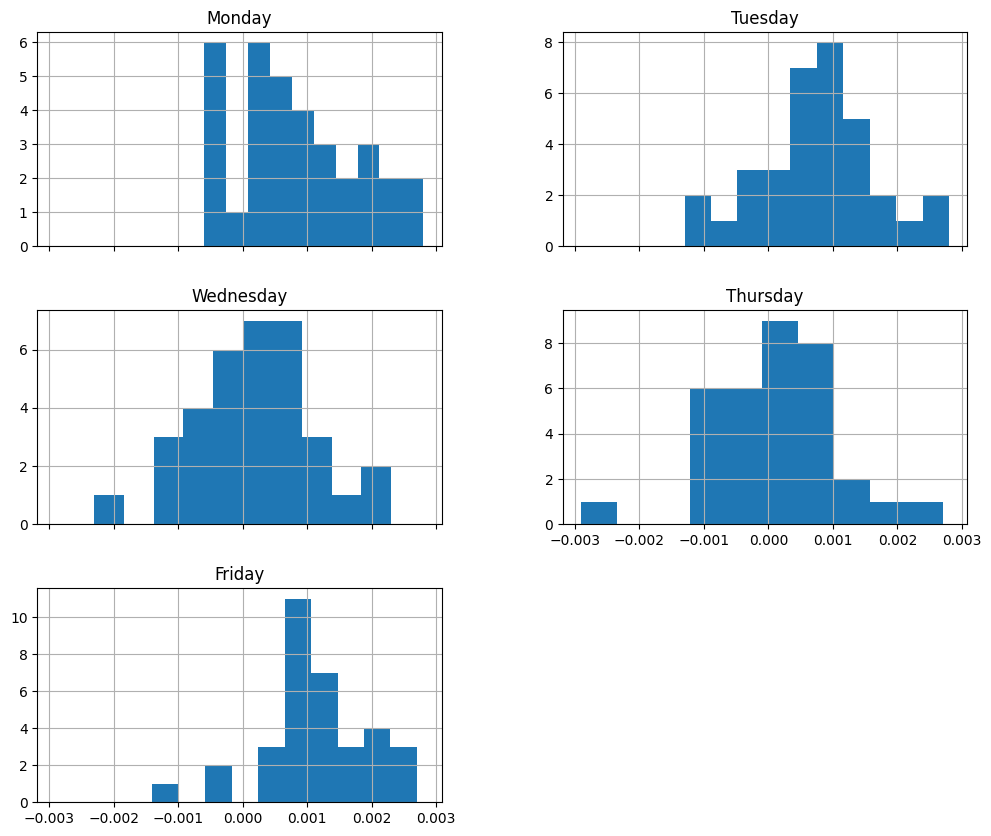

In [14]:
returns_by_weekday = df_returns.groupby(df_returns.index.weekday).mean()
returns_by_weekday.index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
returns_by_weekday.transpose().round(4).hist(figsize = (12, 10), sharex = True)
plt.show()